In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch
import time

sys.path.append("../Lib")

from mcmc import MetropolisGauss
from steep import Steep
from flow import BG_RealNVP
from plot import plot_forward_backward_2d

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
model=Steep(w=2)

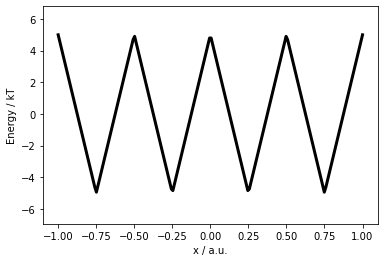

In [5]:
_=model.plot_dimer_energy()

In [6]:
nsteps = 500000
stride = 10
noise=0.05
burnin=100000
xl=np.array([-0.5,0])
xr=np.array([0.5,0])

In [7]:
sampler_l = MetropolisGauss(model, xl, noise=noise, burnin=burnin, stride=stride)
sampler_l.run(nsteps)

In [8]:
sampler_r = MetropolisGauss(model, xr, noise=noise, burnin=burnin, stride=stride)
sampler_r.run(nsteps)

In [9]:
xl=sampler_l.traj
xr=sampler_r.traj

In [10]:
x_brute=np.vstack((xl,xr))
x_brute.shape

(80000, 2)

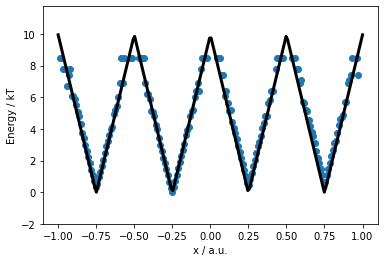

In [11]:
_=model.plot_sample_energy(x_brute)

In [12]:
model_BG=BG_RealNVP(model,dim=model.dim)

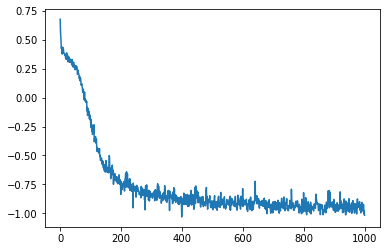

In [13]:
loss=model_BG.train_ML(x_brute,iter=1000,lr=1e-4,batch_size=2048)
plt.plot(loss)

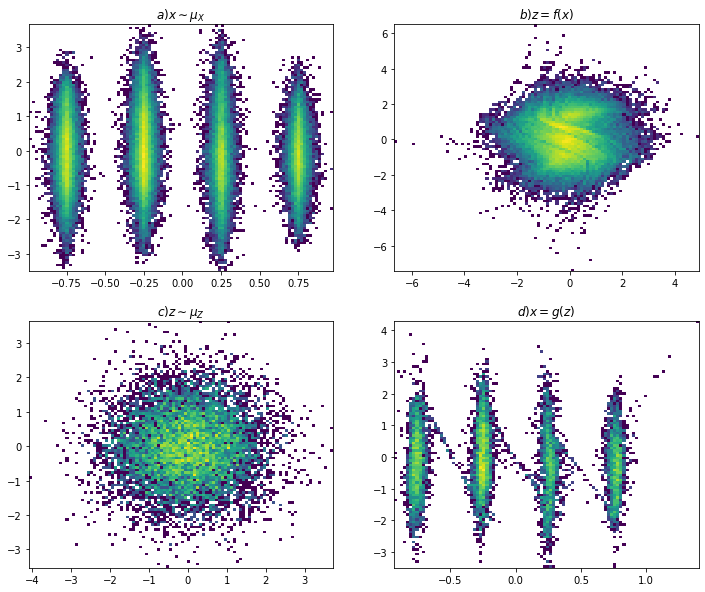

In [14]:
plot_forward_backward_2d(model_BG,x_brute,10000)

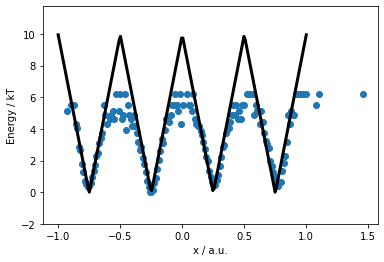

In [15]:
z, x, _ = model_BG.sample(10000)
_=model.plot_sample_energy(x)

In [16]:
model_BG=BG_RealNVP(model,dim=model.dim)

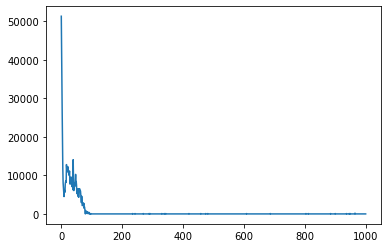

In [17]:
loss=model_BG.train_mix(x_brute,iter=1000,lr=1e-4,batch_size=2048,w_kl=0.2, w_ml=0.8)
plt.plot(loss)

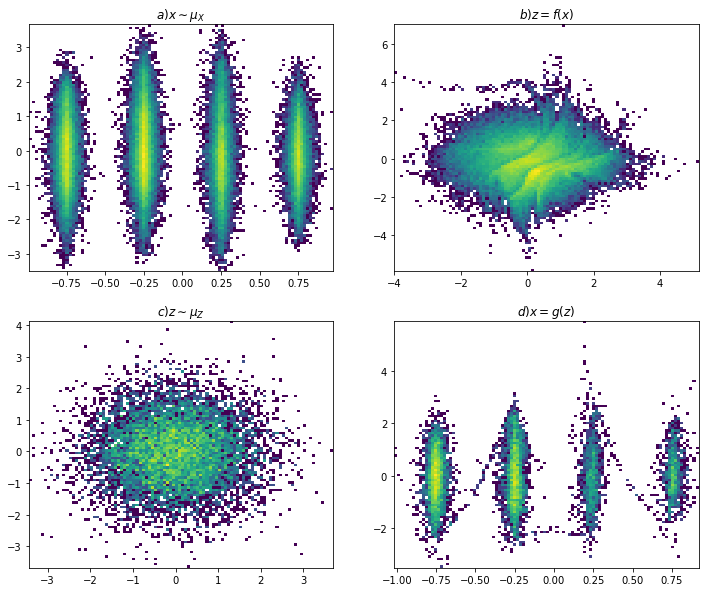

In [18]:
plot_forward_backward_2d(model_BG,x_brute,10000)

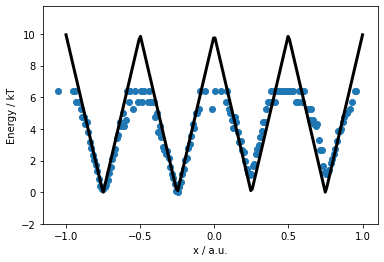

In [19]:
z, x, _ = model_BG.sample(10000)
_=model.plot_sample_energy(x)

In [20]:
model_BG=BG_RealNVP(model,dim=model.dim)

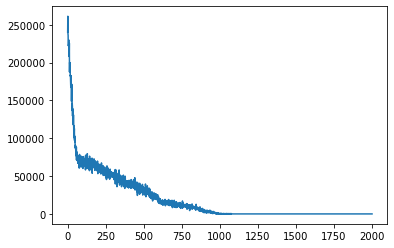

In [21]:
loss=model_BG.train_KL(iter=2000,training_data_size=10000,lr=1e-5,batch_size=2048)
plt.plot(loss)

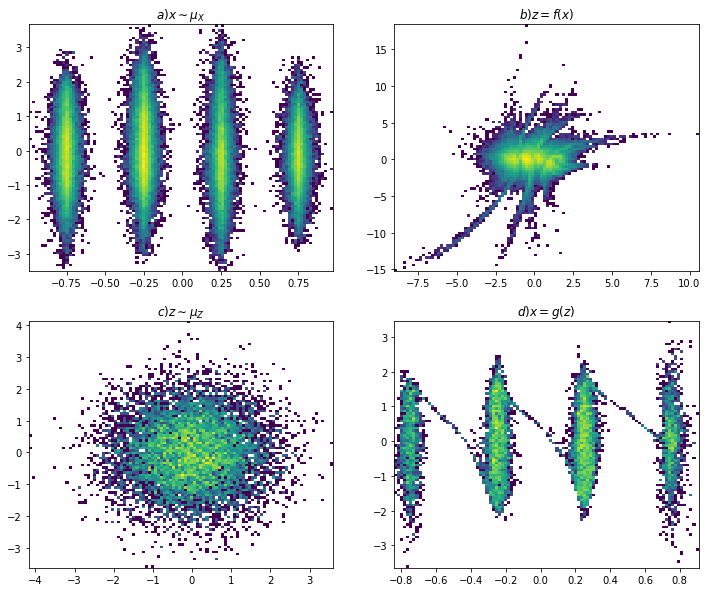

In [22]:
plot_forward_backward_2d(model_BG,x_brute,10000)

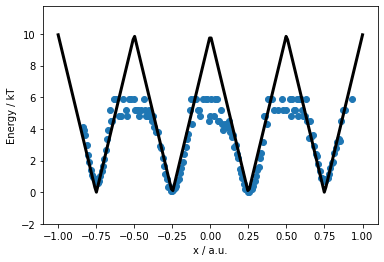

In [23]:
z, x, _ = model_BG.sample(10000)
_=model.plot_sample_energy(x)